Introduction
-

For my part of the project I did different kinds of bike/pedestrian lanes. This refers to lanes that speciffically had bikers and pedestrians in mind when they were implimented.

Pittsbugh over the years has been adding more and more of these types of lanes, the dataset refers to them as "Bike lanes" "Sharrows" "BL/SH" and "Protected" lanes. 

The cities idea is to encourage people to use these lanes more which would cut down on traffic, while making the experience safer. 


In [20]:
import pandas as pd

chip = pd.read_csv("Dictionary.csv")  
chip.head()

selected_columns = chip[["_id", "Year Added", "Street", "Type"]]
print(selected_columns.head(66)) #change this number to view more or less


    _id  Year Added                 Street       Type
0     1        1980            Resevoir Dr  Bike Lane
1     2        1980           Riverview Dr  Bike Lane
2     3        1983          Beechwood Ave  Bike Lane
3     4        2007            Liberty Ave        NaN
4     5        2007      Birmingham Bridge  Bike Lane
..  ...         ...                    ...        ...
61   62        2015                Bigelow        NaN
62   63        2015  O'Hara Bigelow Bayard      Bl/SH
63   64        2015         Schenley Drive  Protected
64   65        2015            East Street  Bike Lane
65   66        2015          Howard Street   Sharrows

[66 rows x 4 columns]


----------------------------------

This is a list of all the street, lane type and the year added.

But we cant get anything useful out of this, so we'll format it differently.


-----------------------------------------------------

Getting the total number of bike lane miles

-------------------------

In [1]:
import pandas as pd


chip = pd.read_csv("Dictionary.csv")

#sum
total_bike_lane_distance = chip["Bike Lane Distance (Miles)"].sum()

print("Total Bike Lane Distance (Miles):", total_bike_lane_distance)


Total Bike Lane Distance (Miles): 40.66


The Metric:
-
For my dataset, a lot of the data isn't necessarily useful for determining saftey, so how we were able to derive this is by, when the lanes were added, and how many of them there are in a given area.

In total there are 63 of these lanes in Pittsburgh and bike lanes span for 40.66 miles in total


-----------------------------------------------

In [32]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Show all columns

# Your existing code
bike_lane_counts = chip.groupby(['Year Added', 'Type']).size().unstack(fill_value=0)
bike_lane_counts['Total'] = bike_lane_counts.sum(axis=1)
bike_lane_counts_sorted = bike_lane_counts.sort_index(ascending=True)
cols_to_print = bike_lane_counts_sorted.columns[:-1]

print("Different types of lanes (sorted by year):")
print(bike_lane_counts_sorted[cols_to_print])
print("\nTotal: 63")


Different types of lanes (sorted by year):
Type        BL/SH  Bike Lane  Bl/SH  Protected  Sharrows
Year Added                                              
1980            0          2      0          0         0
1983            0          1      0          0         0
2007            0          1      0          0         0
2008            1          1      0          0         0
2009            1          2      0          0         1
2010            0          2      0          0         2
2011            1          1      0          0        10
2012            1          6      0          0         6
2013            2          3      0          0         6
2014            0          1      0          3         1
2015            1          3      1          2         1

Total: 63


------------------------------

Here it is sorted, but currently it's just numberes so it's hard to visually see and understand the data, so we'll convert it into a bar segmented bar graph.

---------------------

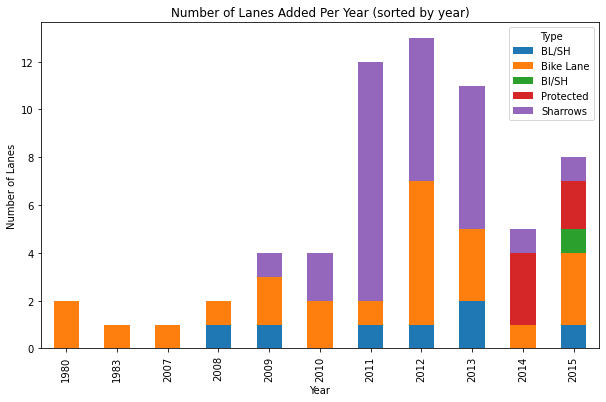

In [28]:
import matplotlib.pyplot as plt

# Drop the 'Total' column
bike_lane_counts_no_total = bike_lane_counts_sorted.drop(columns=['Total'])

# Plot the stacked bar plot
bike_lane_counts_no_total.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Lanes Added Per Year (sorted by year)')
plt.xlabel('Year')
plt.ylabel('Number of Lanes')
plt.legend(title='Type')
plt.show()


---------------------------

The Best Neighborhood:
-
So based purely off of the frequency of "Bike lanes" "Sharrows" "BL/SH" and "Protected" lanes, The area surrounding the Strip District has the most. 

Because of this the Strip District boasts some of the most cyclist-friendly infrastructure in the city; making this area "the best" for cyclists 

In [1]:
import folium
import pandas as pd

# Create a map centered around Pittsburgh
m = folium.Map(location=[40.4406, -79.9959], zoom_start=13)

addresses = [
    "Reservoir Dr", "Riverview Dr", "Beechwood Ave", "Liberty Ave", "Birmingham Bridge",
    "East Liberty Blvd", "Greenfield Rd", "Wightman Ave", "Beacon Ave", "Penn Ave", "Forbes Ave", "Dallas Ave", "Hamilton Ave",
    "Wilkins Ave", "Highland Ave", "Friendship Ave", "Millvale Ave", "Centre Ave", "Neville St", "Ellsworth Ave", "Merchant St",
    "Brighton Rd", "Liberty Ave", "W. Ohio St", "Brighton Rd", "E Carson St", "Ellsworth", "Butler St", "E Ohio St", "Thomas", 
    "Reynolds", "Meade", "Homewood", "S Bouquet St", "Brereton/28th", "Dobson", "Braddock Ave", "Sennot St",
    "Meyran Ave", "Coltart", "Atwood St", "Highland", "Mairdale", "Pocusset", "Negley Run", "Morewood Ave",
    "Schenley Dr", "Saline St", "6th", "Federal St", "Roberto Clemente", "40th St", "Bigelow", "O'Hara Bigelow Bayard",
    "East Street", "Howard Street"]

import numpy as np
np.random.seed(0)
latitudes = 40.4406 + np.random.randn(len(addresses)) * 0.01
longitudes = -79.9959 + np.random.randn(len(addresses)) * 0.01

data = pd.DataFrame({
    'Address': addresses,
    'Latitude': latitudes,
    'Longitude': longitudes
})

# Add markers
for index, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Address'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

m


Conclusion:
-
In conclusion, from the data, graphs, and map, we can see that over the years, the city of Pittsburgh has made significant strides in enhancing its cyclist and pedestrian infrastructure, evident through the steady addition of "Bike lanes," "Sharrows," "BL/SH," and "Protected" lanes. Currently, there are 40.66 miles of these dedicated lanes, marking a substantial investment in promoting alternative modes of transportation and encouraging a more sustainable urban environment. There are alsdo talks about adding even more Bike Lanes, etc. as well. Based on the current distrabution of lanes the best neighborhood would go to the Strip District in first place, The South Side Flats in second, and Fineview in third.